In [1]:
import pandas as pd #utilizada para importar os nossos dados
import matplotlib.pyplot as plt #utilizada para plotar os gráficos
import numpy as np  # utilizada para operações matemáticas

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importando os dados
df_petr4=pd.read_csv('PETR4.SA.csv')

In [4]:
#mostrando os dados
df_petr4.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-18,12.45,14.00,12.45,13.15,11.802080,142924900.0
1,2017-05-19,13.75,13.90,13.46,13.62,12.223903,70983900.0
2,2017-05-22,13.35,13.51,13.00,13.40,12.026454,55014900.0
3,2017-05-23,13.45,13.60,13.38,13.49,12.107227,48520100.0
4,2017-05-24,13.75,14.09,13.69,14.05,12.609827,54065800.0


In [5]:
#mostrando os dados
df_petr4.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
990,2021-05-11,24.440001,25.170000,24.320000,25.150000,25.150000,73729900.0
991,2021-05-12,24.950001,25.530001,24.690001,24.780001,24.780001,89980700.0
992,2021-05-13,24.760000,25.100000,24.430000,24.990000,24.990000,77282100.0
993,2021-05-14,25.799999,26.379999,25.549999,26.299999,26.299999,196135500.0
994,2021-05-17,26.299999,26.660000,26.200001,26.660000,26.660000,83512600.0


In [6]:
#mostrando os tipos de dados encontrados
df_petr4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       995 non-null    object 
 1   Open       991 non-null    float64
 2   High       991 non-null    float64
 3   Low        991 non-null    float64
 4   Close      991 non-null    float64
 5   Adj Close  991 non-null    float64
 6   Volume     991 non-null    float64
dtypes: float64(6), object(1)
memory usage: 54.5+ KB


In [7]:
#retirando os valores nulos
df_petr4=df_petr4.dropna()
df_petr4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 994
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       991 non-null    object 
 1   Open       991 non-null    float64
 2   High       991 non-null    float64
 3   Low        991 non-null    float64
 4   Close      991 non-null    float64
 5   Adj Close  991 non-null    float64
 6   Volume     991 non-null    float64
dtypes: float64(6), object(1)
memory usage: 61.9+ KB


In [8]:
#transformando os dados
df_petr4['Date'] = pd.to_datetime(df_petr4.Date,format='%Y-%m-%d')
df_petr4.set_index('Date',inplace=True)

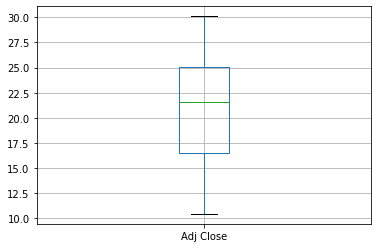

In [9]:
#verificando se existem outliers nos dados de fechamento
df_petr4.boxplot(column='Adj Close');

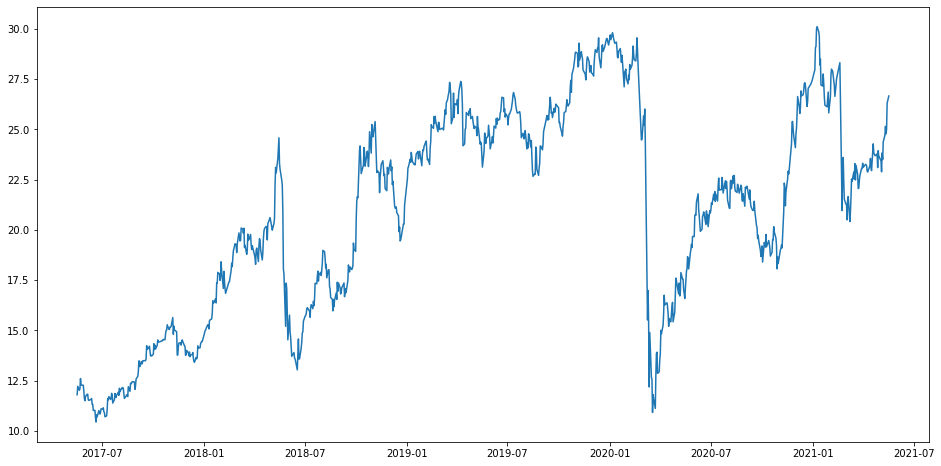

In [10]:
#plotando o gráfico
plt.figure(figsize=(16,8))
plt.plot(df_petr4['Adj Close'], label='Variação da PETR4');

In [29]:
#criando um novo dataset
novo_petr4 = pd.DataFrame(index=range(0,len(df_petr4)),columns=['Date', 'Adj Close'])

df_petr4_2=df_petr4.reset_index()


In [30]:
df_petr4_2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-18,12.45,14.00,12.45,13.15,11.802080,142924900.0
1,2017-05-19,13.75,13.90,13.46,13.62,12.223903,70983900.0
2,2017-05-22,13.35,13.51,13.00,13.40,12.026454,55014900.0
3,2017-05-23,13.45,13.60,13.38,13.49,12.107227,48520100.0
4,2017-05-24,13.75,14.09,13.69,14.05,12.609827,54065800.0


In [31]:
for i in range(0,len(df_petr4)):
    novo_petr4['Date'][i] = df_petr4_2['Date'][i]
    novo_petr4['Adj Close'][i] = df_petr4_2['Adj Close'][i]

In [32]:
novo_petr4.head()

,Date,Adj Close
0,2017-05-18 00:00:00,11.8021
1,2017-05-19 00:00:00,12.2239
2,2017-05-22 00:00:00,12.0265
3,2017-05-23 00:00:00,12.1072
4,2017-05-24 00:00:00,12.6098


In [12]:
#!pip install fastai
from fastai.tabular import  add_datepart
add_datepart(novo_petr4, 'Date')

,Adj Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,11.8021,2017,5,20,18,3,138,False,False,False,False,False,False,1495065600
1,12.2239,2017,5,20,19,4,139,False,False,False,False,False,False,1495152000
2,12.0265,2017,5,21,22,0,142,False,False,False,False,False,False,1495411200
3,12.1072,2017,5,21,23,1,143,False,False,False,False,False,False,1495497600
4,12.6098,2017,5,21,24,2,144,False,False,False,False,False,False,1495584000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,25.15,2021,5,19,11,1,131,False,False,False,False,False,False,1620691200
987,24.78,2021,5,19,12,2,132,False,False,False,False,False,False,1620777600
988,24.99,2021,5,19,13,3,133,False,False,False,False,False,False,1620864000
989,26.3,2021,5,19,14,4,134,False,False,False,False,False,False,1620950400


In [13]:
#removendo a coluna de timestamp
novo_petr4.drop('Elapsed', axis=1, inplace=True)

In [14]:
novo_petr4.head()

,Adj Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,11.8021,2017,5,20,18,3,138,False,False,False,False,False,False
1,12.2239,2017,5,20,19,4,139,False,False,False,False,False,False
2,12.0265,2017,5,21,22,0,142,False,False,False,False,False,False
3,12.1072,2017,5,21,23,1,143,False,False,False,False,False,False
4,12.6098,2017,5,21,24,2,144,False,False,False,False,False,False


In [15]:
novo_petr4['seg_sext'] = 0
for i in range(0,len(novo_petr4)):
    if (novo_petr4['Dayofweek'][i] == 0 or novo_petr4['Dayofweek'][i] == 4):
        novo_petr4['seg_sext'][i] = 1
    else:
        novo_petr4['seg_sext'][i] = 0

In [16]:
novo_petr4.head()

,Adj Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,seg_sext
0,11.8021,2017,5,20,18,3,138,False,False,False,False,False,False,0
1,12.2239,2017,5,20,19,4,139,False,False,False,False,False,False,1
2,12.0265,2017,5,21,22,0,142,False,False,False,False,False,False,1
3,12.1072,2017,5,21,23,1,143,False,False,False,False,False,False,0
4,12.6098,2017,5,21,24,2,144,False,False,False,False,False,False,0


In [17]:
#dividindo entre treino e validação
train = novo_petr4[:int(novo_petr4.shape[0]*0.7)]
valid = novo_petr4[int(novo_petr4.shape[0]*0.7):]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

In [18]:
#aplicando o kNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [20]:
#definindo o modelo de normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
#aplicando a normalização
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [22]:
#utilizando o gridSearch
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [23]:
#criando o modelo de previsão
model.fit(x_train,y_train)
preds = model.predict(x_valid)

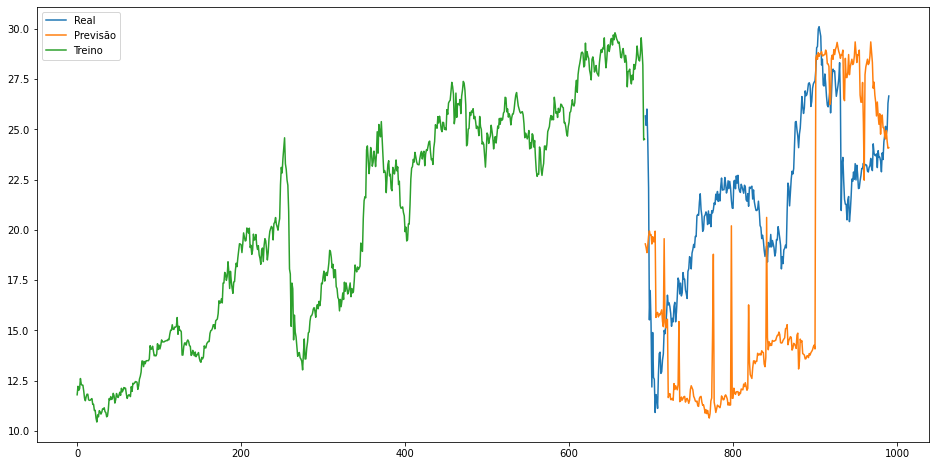

In [28]:
#plot
plt.figure(figsize=(16,8))
valid.loc[:,'Predictions'] = 0
valid.loc[:,'Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close'])
plt.legend(['Real','Previsão','Treino']);